# Solvent Analysis

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [2]:
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

/usr/local/anaconda3/envs/bio/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))


In [3]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
## MDAnalysis
u = mda.Universe(PSF, DCD)
## MDTraj
t = mdt.load(DCD, top=PSF)
## PyTraj
p = mdp.load(DCD, top=PSF)

# Surface accesible solvent area (SASA)
* https://en.wikipedia.org/wiki/Accessible_surface_area

In [6]:
## MDTraj
sasa = mdt.shrake_rupley(t)
print(t)
print('sasa data shape', sasa.shape)

total_sasa  = sasa.sum(axis=1)
print(total_sasa.shape)

<mdtraj.Trajectory with 100 frames, 7051 atoms, 2016 residues, and unitcells>
sasa data shape (100, 7051)
(100,)


Text(0,0.5,'Total SASA (nm)^2')

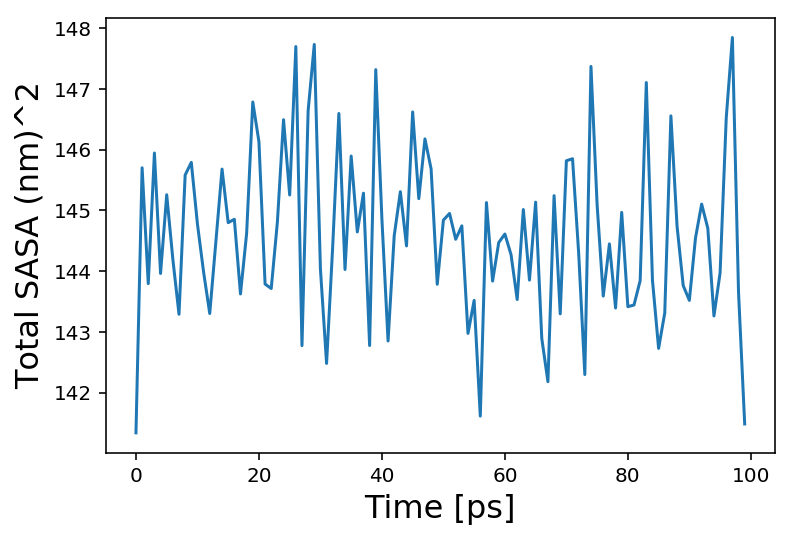

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pylab as plt
plt.plot(t.time, total_sasa)
plt.xlabel('Time [ps]', size=16)
plt.ylabel('Total SASA (nm)^2', size=16)

Text(0,0.5,'SASA autocorrelation')

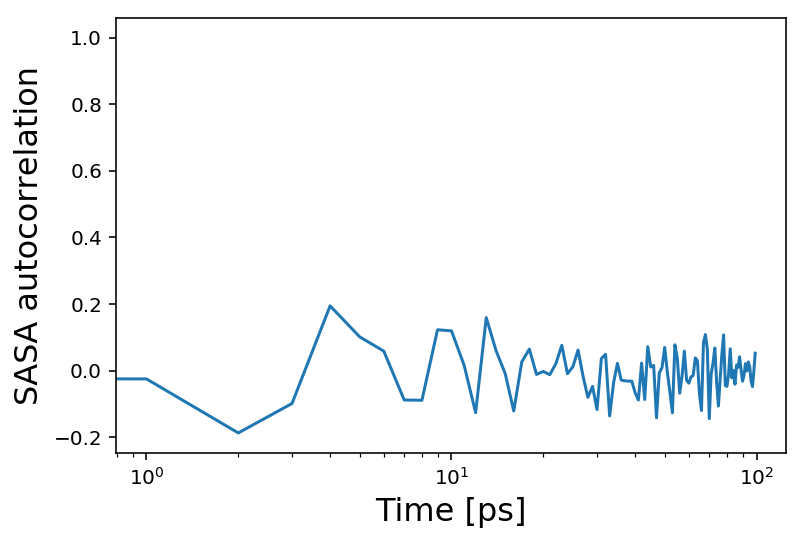

In [10]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    import numpy as np
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

plt.semilogx(t.time, autocorr(total_sasa))
plt.xlabel('Time [ps]', size=16)
plt.ylabel('SASA autocorrelation', size=16)

Text(0,0.5,'g(r)')

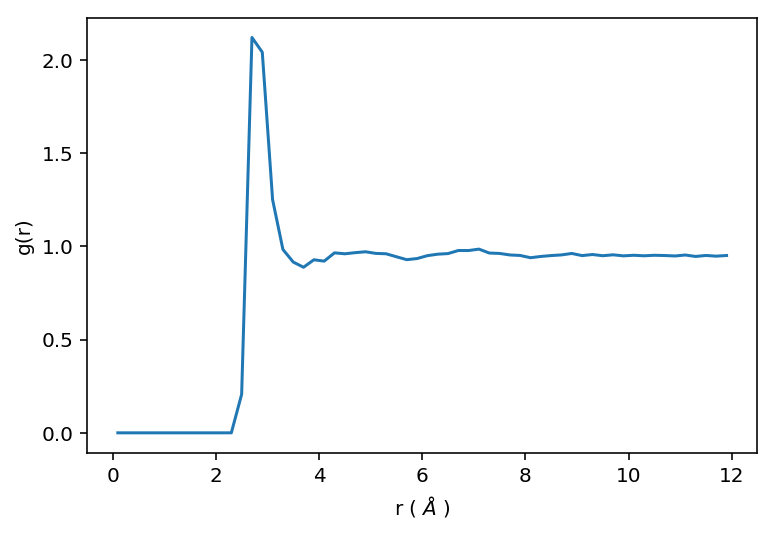

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib
from matplotlib import pyplot as plt
p2 = mdp.load_sample_data('tz2')
rdf_data = mdp.rdf(p2, solvent_mask=':WAT@O', 
                   solute_mask=':WAT@O', bin_spacing=0.2,
                   maximum=12.)

plt.plot(rdf_data[0], rdf_data[1])
plt.xlabel(r"r ( $\AA$ )")
plt.ylabel('g(r)')
#plt.savefig('rdf_tz2_ortho.png')